In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 data points
num_samples = 10000

# Features
bid_clarity = np.random.randint(4, 11, num_samples)  # Range: 4 to 10
experience_level = np.random.randint(1, 11, num_samples)  # Range: 1 to 10 years
price = np.random.randint(300, 800, num_samples)  # Balanced price range: $300 - $800
reputation_score = np.random.randint(3, 10, num_samples)  # Range: 3 to 10

# Target Variable: Bid Rank (Simulated as a weighted sum with some noise)
bid_rank = (
    (bid_clarity * 3) + (experience_level * 2) + (10 - np.abs(price - 550) / 50) + (reputation_score * 4)
    + np.random.normal(0, 5, num_samples)  # Adding some noise
)

# Create DataFrame
df = pd.DataFrame({
    "Bid Clarity": bid_clarity,
    "Experience Level": experience_level,
    "Price ($)": price,
    "Reputation Score": reputation_score,
    "Bid Rank (Target)": np.round(bid_rank, 2)
})

In [27]:
df

,Bid Clarity,Experience Level,Price ($),Reputation Score,Bid Rank (Target)
0,10,2,455,5,63.83
1,7,7,792,4,57.59
2,8,9,697,5,59.96
3,10,10,308,8,92.85
4,6,2,414,4,38.68
...,...,...,...,...,...
9995,6,1,301,6,51.53
9996,8,2,631,4,52.91
9997,5,6,779,6,61.89
9998,6,10,789,4,67.26


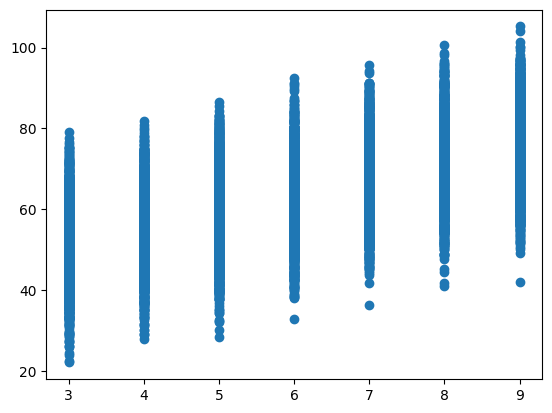

In [ ]:
# plt.scatter(df["Bid Clarity"] , df["Bid Rank (Target)"])
# plt.scatter(df["Experience Level"] , df["Bid Rank (Target)"])
# plt.scatter(df["Price ($)"] , df["Bid Rank (Target)"])
# plt.scatter(df["Reputation Score"] , df["Bid Rank (Target)"])

In [29]:
x = df.drop("Bid Rank (Target)" , axis=1)
y = df["Bid Rank (Target)"]

In [30]:
model = LinearRegression()
xtrain , xtest , ytrain ,ytest = train_test_split(x,y,train_size=.9)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8309637807126156

In [32]:
import joblib

# exporting the coeff of the model to be used again and again
joblib.dump(model, "bid_ranking_model.pkl")

['bid_ranking_model.pkl']